**Proje Başlığı: Otel Rezervasyon İptallerini Azaltma ve Gelir Optimizasyonu Analizi**

**Proje Senaryosu (Business Problem):**

"Horizon Hotels" adlı, hem şehir merkezlerinde ("City Hotel") hem de tatil beldelerinde ("Resort Hotel") otelleri bulunan bir otel zincirinin yöneticisisiniz. Şirket, son çeyreklerde özellikle yüksek rezervasyon iptal oranları nedeniyle ciddi bir gelir kaybı ve operasyonel planlama zorlukları yaşamaktadır. İptal edilen odaların son dakikada doldurulamaması, hem doluluk oranlarını düşürmekte hem de gelirleri olumsuz etkilemektedir.

Sizden, veri analisti olarak bu sorunun kök nedenlerini anlamak, hangi rezervasyonların iptal edilme olasılığının yüksek olduğunu tahmin etmek ve bu iptalleri azaltmak için veriye dayalı, eyleme geçirilebilir stratejiler geliştirmeniz isteniyor.

Projenin Amacı:

Bu projenin temel amacı, otel rezervasyon iptallerine yol açan ana faktörleri belirlemek, yüksek riskli rezervasyonları proaktif olarak tespit edebilecek bir model geliştirmek ve iptal oranını düşürerek otel gelirlerini optimize edecek stratejik öneriler sunmaktır.

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv("hotel_bookings 2.csv")

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [10]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [5]:
df['market_segment'].value_counts()


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [24]:
iptal_edilen= (df["is_canceled"] == 1).sum() 
print(iptal_edilen)

44224


In [26]:
iptal_edilen= df[df["is_canceled"] == 1]

In [17]:
iptal_oran = (df["is_canceled"]==1).mean()
print( "%", iptal_oran * 100)

% 37.041628277075134


In [28]:
iptal_sayısı = iptal_edilen["hotel"].value_counts()
print(iptal_sayısı)

hotel
City Hotel      33102
Resort Hotel    11122
Name: count, dtype: int64


In [92]:
iptal_tarih_sayıları = iptal_edilen["reservation_status_date"].value_counts().sort_index()
print(iptal_tarih_sayıları)


reservation_status_date
1/1/2015     763
1/1/2016      10
1/1/2017      22
1/10/2015     21
1/10/2016     28
            ... 
9/8/2015       3
9/8/2016      38
9/8/2017      17
9/9/2015     183
9/9/2016      39
Name: count, Length: 902, dtype: int64


In [32]:
import calendar

In [ ]:
ay_sayi = {month: index for index, month in enumerate(calendar.month_name) if month}
df["arrival_month_num"] = df["arrival_date_month"].map(ay_sayi)

iptal_edilen = df[df["is_canceled"]== 1]
ilk_cegrek = iptal_edilen[iptal_edilen["arrival_month_num"].isin([1,2,3])]
son_cegrek = iptal_edilen[iptal_edilen["arrival_month_num"].isin([10,11,12])]

print(f"ilk_cegrek de iptal edilen sayısı : {len(ilk_cegrek)}")
print(f"son_cegrek de iptal edilen sayısı: {len(son_cegrek)}")
    # hangi yıl ?                                               

ilk_cegrek de iptal edilen sayısı : 7652
son_cegrek de iptal edilen sayısı: 8739


In [18]:
iptal_edilen = df[df["is_canceled"] == 1].copy()

In [22]:

iptal_edilen["arrival_date"] = pd.to_datetime(
    iptal_edilen["arrival_date_year"].astype(str) + "-" +
    iptal_edilen["arrival_date_month"] + "-" +
    iptal_edilen["arrival_date_day_of_month"].astype(str),
    format="%Y-%B-%d"
)

In [20]:
iptal_edilen["reservation_status_date"] = pd.to_datetime(
    iptal_edilen["reservation_status_date"], 
    dayfirst=True,  # Günü önce kabul et
    errors='coerce' # Hata varsa NaT yap
)

iptal_edilen["reservation_status_date"] = pd.to_datetime(iptal_edilen["reservation_status_date"])
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
son_dakika_iptaller = iptal_edilen[iptal_edilen["gun_kala_iptal"] <= 2]
print(f"Son dakika iptal sayısı: {len(son_dakika_iptaller)}")


KeyError: 'arrival_date'

In [21]:
print("Ortalama iptal zamanı (gün kala):", iptal_edilen["gun_kala_iptal"].mean())


KeyError: 'gun_kala_iptal'

In [66]:
iptal_edilen = df[df["is_canceled"] == 1]
iptal_edilmeyen = df[df["is_canceled"] == 0]


In [74]:
for col in ["deposit_type", "customer_type", "market_segment", "distribution_channel", "hotel", "meal", "reserved_room_type", "assigned_room_type"]:
    oranlar = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False)
    print(f"--- İptal oranları: {col} ---")
    print(oranlar)
    print()


--- İptal oranları: deposit_type ---
deposit_type
Non Refund    0.993624
No Deposit    0.283770
Refundable    0.222222
Name: is_canceled, dtype: float64

--- İptal oranları: customer_type ---
customer_type
Transient          0.407463
Contract           0.309617
Transient-Party    0.254299
Group              0.102253
Name: is_canceled, dtype: float64

--- İptal oranları: market_segment ---
market_segment
Undefined        1.000000
Groups           0.610620
Online TA        0.367211
Offline TA/TO    0.343160
Aviation         0.219409
Corporate        0.187347
Direct           0.153419
Complementary    0.130552
Name: is_canceled, dtype: float64

--- İptal oranları: distribution_channel ---
distribution_channel
Undefined    0.800000
TA/TO        0.410259
Corporate    0.220758
GDS          0.191710
Direct       0.174599
Name: is_canceled, dtype: float64

--- İptal oranları: hotel ---
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

--- İptal oranları

In [77]:
for col in [ "distribution_channel", "hotel", "meal"]:
    oranlar = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False)
    print(f"--- İptal oranları: {col} ---")
    print(oranlar)
    print()

--- İptal oranları: distribution_channel ---
distribution_channel
Undefined    0.800000
TA/TO        0.410259
Corporate    0.220758
GDS          0.191710
Direct       0.174599
Name: is_canceled, dtype: float64

--- İptal oranları: hotel ---
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

--- İptal oranları: meal ---
meal
FB           0.598997
BB           0.373849
SC           0.372394
HB           0.344603
Undefined    0.244654
Name: is_canceled, dtype: float64



In [23]:
for col in [ "reserved_room_type", "assigned_room_type"]:
    oranlar = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False)
    print(f"--- İptal oranları: {col} ---")
    print(oranlar)
    print()

--- İptal oranları: reserved_room_type ---
reserved_room_type
P    1.000000
H    0.407654
A    0.391074
G    0.364374
L    0.333333
C    0.330472
B    0.329159
D    0.317796
F    0.303763
E    0.292884
Name: is_canceled, dtype: float64

--- İptal oranları: assigned_room_type ---
assigned_room_type
P    1.000000
L    1.000000
A    0.444925
H    0.352528
G    0.305523
E    0.252114
D    0.251244
F    0.247134
B    0.236708
C    0.187789
K    0.043011
I    0.013774
Name: is_canceled, dtype: float64



In [78]:
df["distribution_channel"].isnull().sum()

np.int64(0)

In [75]:
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_month_num'],
      dtype='object')


In [79]:
iptal_sayisi_ulke = df[df["is_canceled"] == 1].groupby("country")["is_canceled"].count().sort_values(ascending=False)

print("--- Ülkelere göre iptal sayıları ---")
print(iptal_sayisi_ulke)


--- Ülkelere göre iptal sayıları ---
country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
SYC        1
UMI        1
TMP        1
VGB        1
ZMB        1
Name: is_canceled, Length: 127, dtype: int64


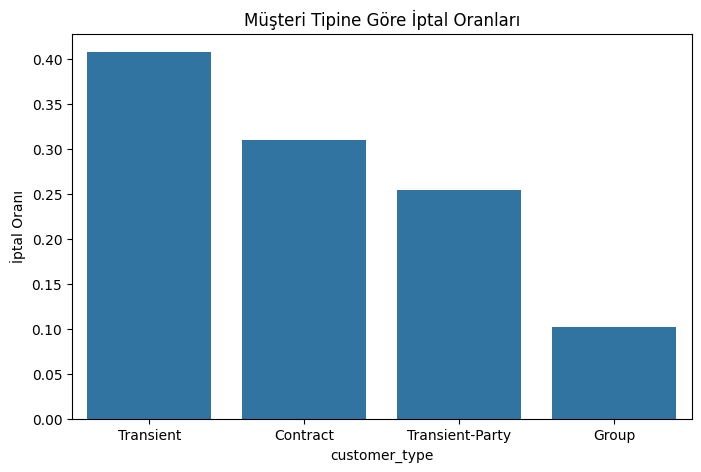

In [81]:
iptal_oranlari = df.groupby("customer_type")["is_canceled"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=iptal_oranlari.index, y=iptal_oranlari.values)
plt.ylabel("İptal Oranı")
plt.title("Müşteri Tipine Göre İptal Oranları")
plt.show()

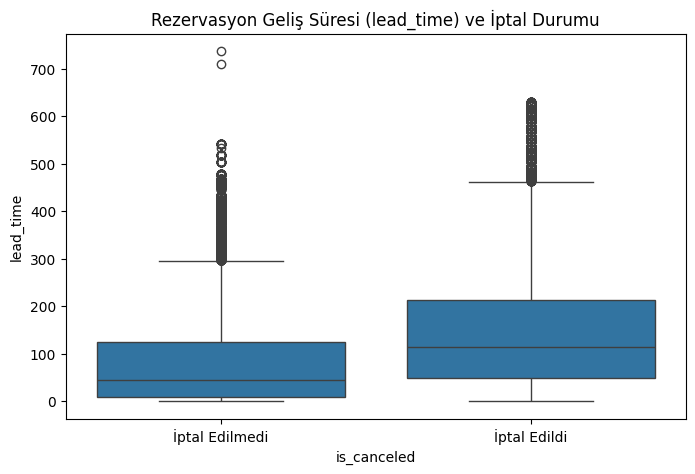

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.xticks([0,1], ["İptal Edilmedi", "İptal Edildi"])
plt.title("Rezervasyon Geliş Süresi (lead_time) ve İptal Durumu")
plt.show()


In [84]:
hotel_customer_iptal = df.groupby(["hotel", "customer_type"])["is_canceled"].mean().unstack()
print(hotel_customer_iptal)


customer_type  Contract     Group  Transient  Transient-Party
hotel                                                        
City Hotel     0.480435  0.098976   0.456165         0.280967
Resort Hotel   0.088401  0.105634   0.311695         0.194969


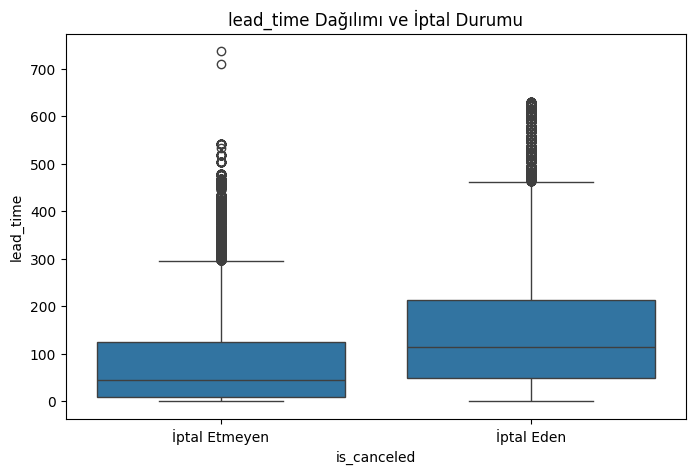

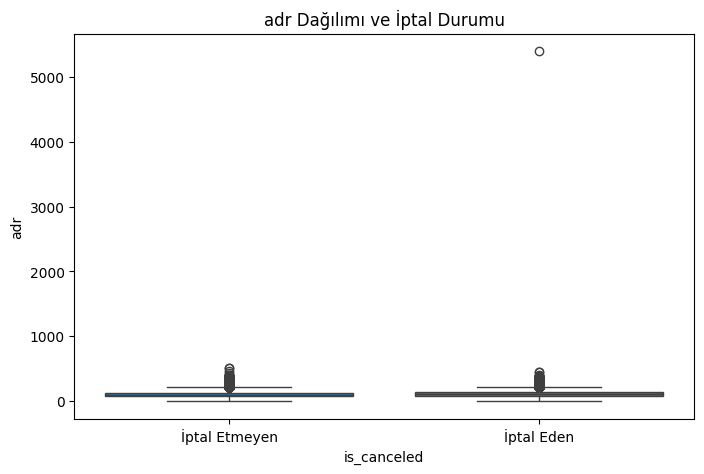

In [85]:
for col in ["lead_time", "adr"]:
    if col in df.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(x="is_canceled", y=col, data=df)
        plt.xticks([0,1], ["İptal Etmeyen", "İptal Eden"])
        plt.title(f"{col} Dağılımı ve İptal Durumu")
        plt.show()

In [91]:

# 2. Hedef ve özellikler
X = df.drop(columns=["is_canceled"])  # Özellikler
y = df["is_canceled"]                 # Hedef

# 3. Kategorik sütunları sayısala çevir (label encoding ile)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 4. Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modeli oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Tahmin yap
y_pred = model.predict(X_test)

# 7. Sonuçları değerlendir
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8. Önemli özellikleri göster
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("Önemli faktörler:")
print(feature_importance.head(10))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

Önemli faktörler:
reservation_status             0.721418
deposit_type                   0.080967
country                        0.037975
lead_time                      0.028040
total_of_special_requests      0.018822
previous_cancellations         0.017247
market_segment                 0.014550
agent                          0.013607
required_car_parking_spaces    0.008264
customer_type                  0.006843
dtype: float64


In [96]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
arrival_date_week_number               0
arrival_date_day_of_month              0
is_canceled                            0
lead_time                              0
stays_in_week_nights                   0
stays_in_weekend_nights                0
babies                                 0
adults                                 0
meal                                   0
market_segment                         0
arrival_date_year                      0
arrival_date_month                     0
is_repeated_guest                      0
distribution_channel                   0
previous_cancellations                 0
previous_bookings_not_canceled         0
assigned_room_type                     0
reserved_room_type                     0
deposit_type                           0
booking_changes 

In [10]:
df["company"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: company, Length: 119390, dtype: float64

In [ ]:
df["company"] = df["company"].fillna(0)
#folat değerlerin içine str ekleme 

In [11]:
country_mod = df["country"].mode()[0]
df["country"]= df["country"].fillna(country_mod)

In [108]:
df["agent"] = df["agent"].fillna(0)


In [12]:
df["agent"]

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [16]:
df["children"].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [13]:
df["children"]= df["children"].fillna(0)

In [115]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month_num
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363,6.552483
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798,3.090619
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,4.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,7.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,12.000000


In [119]:
df["is_canceled"].describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

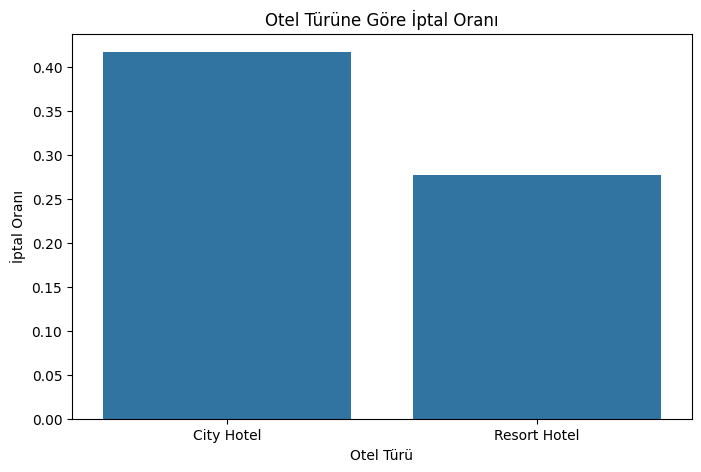

In [120]:
hotel_iptal = df.groupby("hotel")["is_canceled"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="hotel", y="is_canceled", data=hotel_iptal)
plt.title("Otel Türüne Göre İptal Oranı")
plt.ylabel("İptal Oranı")
plt.xlabel("Otel Türü")
plt.show()


In [25]:
# City otelindeki müşteri tipine göre iptal oranları
city_df = df[df["hotel"] == "City Hotel"]
iptal_oranlari = city_df.groupby("customer_type")["is_canceled"].mean().sort_values(ascending=False)
print(iptal_oranlari)

# sonuç CİTY E YALNIZ BAŞVURANLARIN %50 Sİ İPTAL ETMİŞ 
# CİTY E GRUPLA BASVURANLARIN %10 U İPTAL ETMİŞ
# BURDA SIKINTILI GRUP YALNIZ BAŞVURANLAR (TRANSİENT)

customer_type
Contract           0.480435
Transient          0.456165
Transient-Party    0.280967
Group              0.098976
Name: is_canceled, dtype: float64


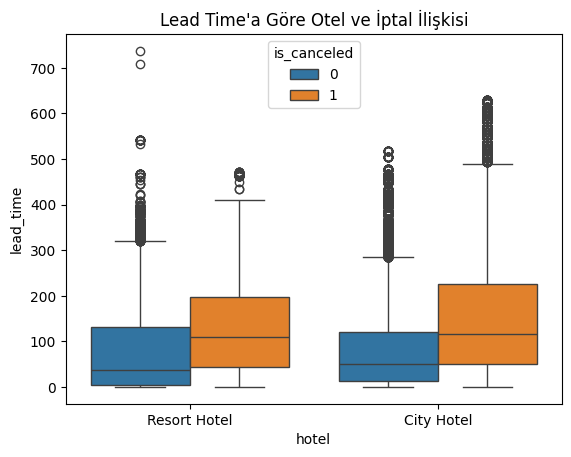

In [128]:
sns.boxplot(x="hotel", y="lead_time", hue="is_canceled", data=df)
plt.title("Lead Time'a Göre Otel ve İptal İlişkisi")
plt.show()


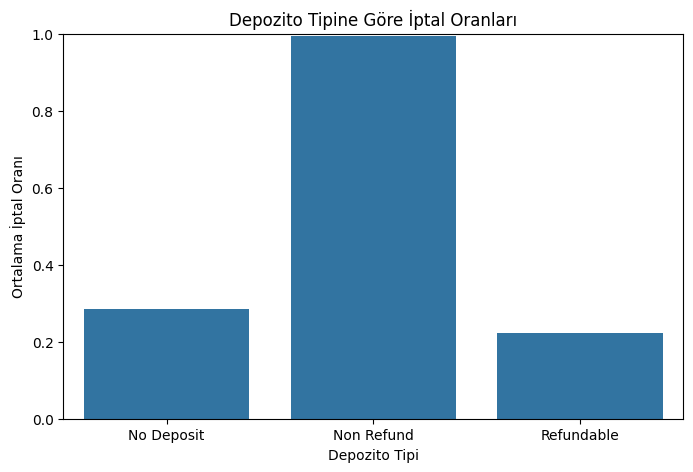

In [130]:
deposit_cancel_rate = df.groupby('deposit_type')['is_canceled'].mean().reset_index()

# Grafik çiz
plt.figure(figsize=(8,5))
sns.barplot(x='deposit_type', y='is_canceled', data=deposit_cancel_rate)
plt.title('Depozito Tipine Göre İptal Oranları')
plt.xlabel('Depozito Tipi')
plt.ylabel('Ortalama İptal Oranı')
plt.ylim(0,1)  # Oran 0-1 arası olduğu için
plt.show()

In [134]:
iptal_edilen["reservation_status_date"] = pd.to_datetime(
    iptal_edilen["reservation_status_date"], 
    dayfirst=True,  # Günü önce kabul et
    errors='coerce' # Hata varsa NaT yap
)

iptal_edilen["reservation_status_date"] = pd.to_datetime(iptal_edilen["reservation_status_date"])
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
iptal_edilen["gun_kala_iptal"] = (iptal_edilen["arrival_date"] - iptal_edilen["reservation_status_date"]).dt.days
son_dakika_iptaller = iptal_edilen[iptal_edilen["gun_kala_iptal"] <= 2]
print(f"Son dakika iptal sayısı: {len(son_dakika_iptaller)}")

Son dakika iptal sayısı: 3204


C:\Users\rabia.ilhan\AppData\Local\Temp\ipykernel_10108\555378665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iptal_edilen["reservation_status_date"] = pd.to_datetime(
C:\Users\rabia.ilhan\AppData\Local\Temp\ipykernel_10108\555378665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iptal_edilen["reservation_status_date"] = pd.to_datetime(iptal_edilen["reservation_status_date"])
C:\Users\rabia.ilhan\AppData\Local\Temp\ipykernel_10108\555378665.py:8: SettingWithCopyWarning: 
A value is trying to be

In [135]:
iptal_edilen['son_dakika_iptal'] = iptal_edilen['gun_kala_iptal'] <= 7
iptal_edilen['son_dakika_iptal'] = iptal_edilen['son_dakika_iptal'].astype(int)

C:\Users\rabia.ilhan\AppData\Local\Temp\ipykernel_10108\2479266605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iptal_edilen['son_dakika_iptal'] = iptal_edilen['gun_kala_iptal'] <= 7
C:\Users\rabia.ilhan\AppData\Local\Temp\ipykernel_10108\2479266605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iptal_edilen['son_dakika_iptal'] = iptal_edilen['son_dakika_iptal'].astype(int)
